In [ ]:
import sys
import os
sys.path.append("/content/ml-project-2-pytyeee/")
REPO_DIR = "ml-project-2-pytyeee/"

In [72]:
import segmentation_models_pytorch as smp
import torch
import matplotlib.pyplot as plt
import re
import matplotlib.image as mpimg
from PIL import Image
from datetime import datetime
from scripts.preprocessing import *
from helpers.model_handler import *
from helpers.mask_to_submission import *

In [ ]:
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [ ]:
test_dir = REPO_DIR + "dataset/test_set_images/"
test_images_filename = test_dir

TESTING_SIZE = 50

test_data = extract_data(test_images_filename, TESTING_SIZE, test=True)
test_data = torch.from_numpy(np.transpose(test_data, (0, 3, 1, 2)))
print(f"Test shape: {test_data.shape}")

test_data = test_data.to(DEVICE)

Loading ml-project-2-pytyeee/dataset/test_set_images/test_1/test_1.png
Loading ml-project-2-pytyeee/dataset/test_set_images/test_50/test_50.png
Test shape: torch.Size([50, 3, 608, 608])


In [ ]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=1, # 1 for grayscale
    activation=ACTIVATION,
)

model = model.to(DEVICE)

In [ ]:
model.load_state_dict(torch.load(REPO_DIR + 'model_saves/model_2023-12-07_0.pt'))

<All keys matched successfully>

In [ ]:
pred_arrays = []
with torch.no_grad():
  pred = model(test_data)
  pred_arrays = torch.where(pred > 0.5, 1., 0.).cpu()
print(pred_arrays.shape)

In [ ]:
pred_imgs = np.transpose(pred.cpu().numpy(), (0, 2, 3, 1)).squeeze()
imgs = np.transpose(test_data.cpu().numpy(), (0, 2, 3, 1))
print(pred_imgs.shape, imgs.shape)

(50, 608, 608) (50, 608, 608, 3)


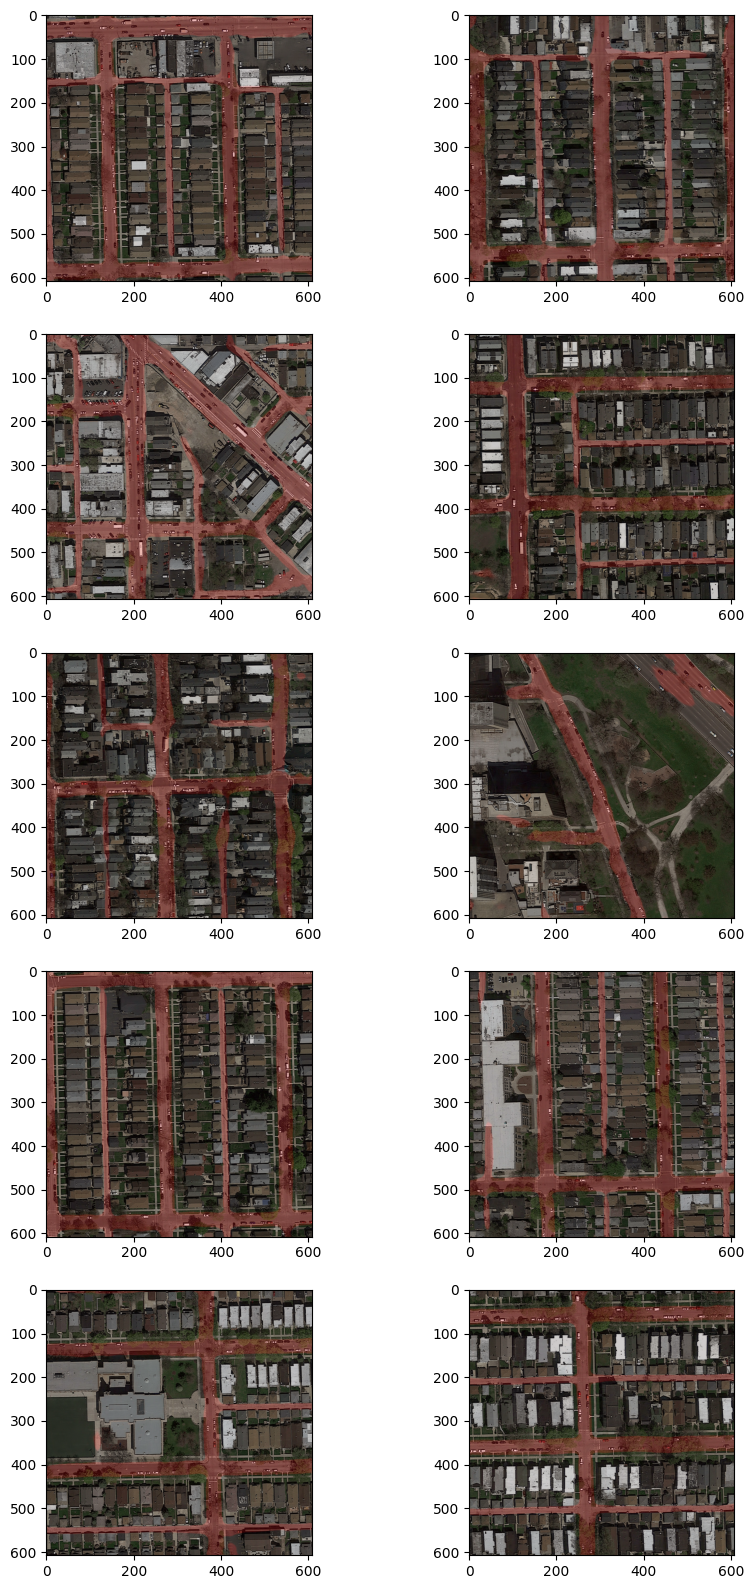

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for i in range(0, TESTING_SIZE, 5):
  axes[i//10, i % 2].imshow(make_img_overlay(imgs[i], pred_imgs[i]))
plt.show()


In [ ]:
SUBMISSION_DIR = REPO_DIR + 'submissions/'
TEST_DIR = REPO_DIR + 'predictions/'

save_prediction(pred_imgs, TEST_DIR)
make_prediction_file(TEST_DIR, SUBMISSION_DIR)